# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

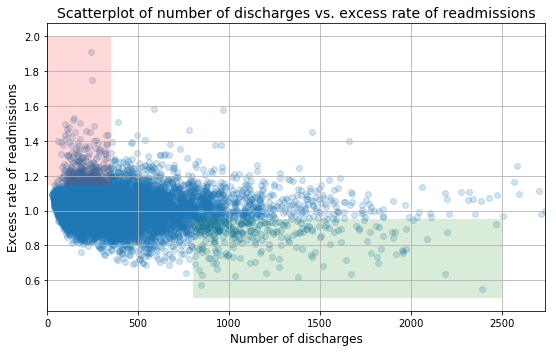

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

It is difficult to agree with the analysis and recommendations based only on the evidence presented.  

A. The downward trend in the scatterplot is somewhat weak and might not be obvious at all without the red and green areas.  The shaded ares appear to be chosen somewhat arbitrarily, perhaps by someone with a bias against small hospitals vs. large ones.

B. The statistics are presented without a margin of error or any proof that they are statistically different.

C. I do not see anything in the scatterplot to suggest "significant correlation" and there is certainly no mathematical proof to back up this claim.  The conclusion that the size of the hospital determines the rate of readmission does not take into account other factors that might be present.  The scatterplot shows many hospitals with lower discharges that have a rate of readmission less than 1.

D. The recommendations are severe and may not be realistic. Closing or consolidating smaller hospitals would be very costly and have a large impact on communities.  Stronger evidence would be needed to prove that these measures would lead to an overall positive change.  

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [5]:
# Confirm the data presented in preliminary report.
# The small hospital dataframe will also be filtered on Discharges > 0 as a zero value 
# will cause an undefined Readmission Ratio

small = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']>0) & (clean_hospital_read_df['Number of Discharges']<100)]
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]

print(f'Number of small hospitals: {len(small)}')
print(f'Number of large hospitals: {len(large)}')

Number of small hospitals: 1188
Number of large hospitals: 463


In [6]:
small_mean = np.mean(small['Excess Readmission Ratio'])
large_mean = np.mean(large['Excess Readmission Ratio'])

small_ct = len(small[small['Excess Readmission Ratio'] > 1])
large_ct = len(large[large['Excess Readmission Ratio'] > 1])

small_pct = small_ct / len(small)
large_pct = large_ct / len(large)

print(f'In hospitals/facilities with number of discharges < 100, mean excess readmission rate is {small_mean:.3f} and {small_pct * 100:.0f}% have excess readmission rate greater than 1.')
print(f'In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is {large_mean:.3f} and {large_pct * 100:.0f}% have excess readmission rate greater than 1.')


In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.


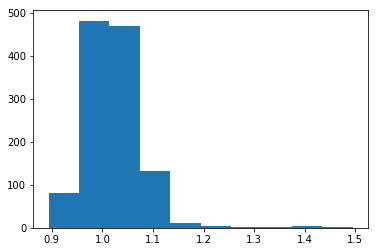

In [7]:
plt.hist(small['Excess Readmission Ratio'])
plt.show()

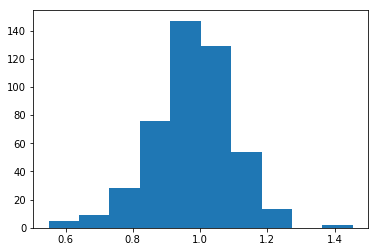

In [8]:
plt.hist(large['Excess Readmission Ratio'])
plt.show()

The data for each group appears to be roughly normal and we have a good sample size for each.  A two-sided t-test will be performed to test the equality of the means.

Null hypothesis: The mean excess readmission rate for small hospitals is equal to that for large hospitals.<br>
Alternative hypothesis: The mean excess readmission rate for small hospitals is not equal to that for large hospitals.

In [9]:
# Import necessary functions for the test and set significance level.
from scipy.stats import ttest_ind

alpha = 0.01

In [10]:
# Perform the test
t_stat, p_value = ttest_ind(small['Excess Readmission Ratio'], large['Excess Readmission Ratio'], equal_var=False)

print(f'p-value: {p_value:.2e}, alpha: {alpha}')

p-value: 1.28e-13, alpha: 0.01


The p-value is much lower than the level of significance and so we can reject the null hypothesis that the two means are equal and conclude that the excess readmission rate for small hospitals is higher than that for large hospitals.

We will now test the proportion of hospitals that have an excess readmission rate greater than 1.

Null hypothesis: The proportion of small hospitals with excess rate of readmission greater than 1 is equal to the proportion of large hospitals.<br>
Alternative hypothesis: The proportion of small hospitals with excess rate of readmission greater than 1 is not equal to the proportion of large hospitals.

In [11]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_value = proportions_ztest(count=[small_ct, large_ct], nobs=[len(small), len(large)])

print(f'p-value: {p_value:.2e}, alpha: {alpha}')

p-value: 4.41e-12, alpha: 0.01


Once again, the p-value is below the significance level and we can reject the null hypothesis and conclude that the proportion of small hospitals with an excess rate of readmission greater than 1 is larger than the proportion for large hospitals.

While the tests show that the excess readmission rates are statistically different for small hospitals compared to large hospitals, it is unlikely that they are practically significant.  Since we are analyzing ratios, it is possible that the actual number of patients that are readmitted to the smaller hospitals is not very high.  With this in mind, it is possible that only small changes would be necessary to bring the readmission ratio for smaller hospitals down to be more in line with that for larger hospitals.

Let's now test the claim that there is significant correlation between hospital capacity and readmission rates.

Null hypothesis: There is no correlation between the number of discharges and readmission rates.<br>
Alternative hypothesis: The number of discharges and readmission rates is correlated.

In [12]:
# Remove rows with null values for excess readmission rates.
hospitals_notnull = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [13]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(hospitals_notnull['Number of Discharges'], hospitals_notnull['Excess Readmission Ratio'])

print(f'Pearson correlation coefficient: {corr:.3f}, p-value: {p_value:.2e}, alpha: {alpha}')

Pearson correlation coefficient: -0.097, p-value: 1.22e-25, alpha: 0.01


The p-value for the test is well below the significance level and we can conclude that the number of discharges is correlated with the excess readmission ratio.  The negative correlation is what we would expect to see as readmission rates tend to decrease as hospital size increases.  However, the absolute value of the correlation is relatively close to zero and so the correlation is weak.  So while the correlation is statistically significant, the claim of "significant correlation" is misleading.

The scatterplot above has the advantage of plotting every point in the original dataset.  It is easy to get a sense of all the data and to immediately see patterns or trends.<br>

On the other hand, many of the data points overlap causing a large blue blob on the left side of the plot, so it is hard to know how many data points this represents.  Also, the highlighted red and green sections are not easy to compare as they are in different corners of the plot and one is horizontal while the other is vertical.

Since the analysis is focused on comparing small vs. large hospitals, we will isolate those two groups are create a side-by-side swarm plot to compare their differences.

In [14]:
# Create dataframe with excess readmission ratio for small and large hospitals with labels.
small_df = small[['Excess Readmission Ratio']]
small_df.loc[:,'Size'] = 'Small'

large_df = large[['Excess Readmission Ratio']]
large_df.loc[:,'Size'] = 'Large'

df = small_df.append(large_df)

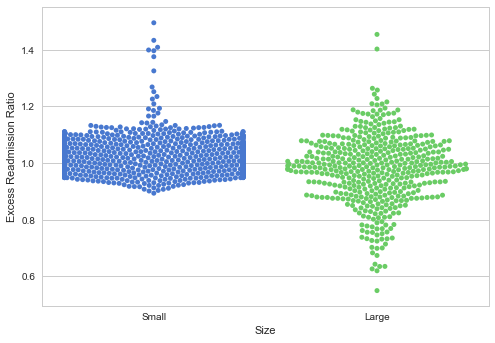

In [15]:
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="Size", y="Excess Readmission Ratio", data=df)

With this side-by-side comparison, it is easily seen that large hospitals are more likely to have a lower excess readmission ratio than small hospitals.